In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 1/5]
I = [0.1, 1/5]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 783 		 0.09 		 0.05 |
| 2837 		 0.45 		 0.28 |
| 3263 		 0.59 		 0.1 |
| 1708 		 0.13 		 0.35 |
| 3396 		 0.01 		 0.33 |
| 3575 		 0.01 		 0.1 |
| 2244 		 0.22 		 0.05 |
| 889 		 0.2 		 0.15 |
| 1841 		 0.01 		 0.27 |
| 102 		 0.16 		 0.3 |
| 3717 		 0.16 		 0.19 |
| 1398 		 0.26 		 0.35 |
| 5188 		 0.03 		 0.07 |
| 102 		 0.12 		 0.17 |
| 483 		 0.24 		 0.19 |
| 2028 		 0.3 		 0.31 |
| 542 		 0.16 		 0.16 |
| 7453 		 0.07 		 0.43 |
| 1604 		 0.24 		 0.0 |
-------------------------------------
The s.d. of M is: 1447.0
The s.d. of E is: 0.15
The s.d. of I is: 0.16
-------------------------------------
The mean of M is: 2243
The mean of E is: 0.22
The mean of I is: 0.2
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 2000, 0.2, 0.2
condition mean M unsatisfied
condition m

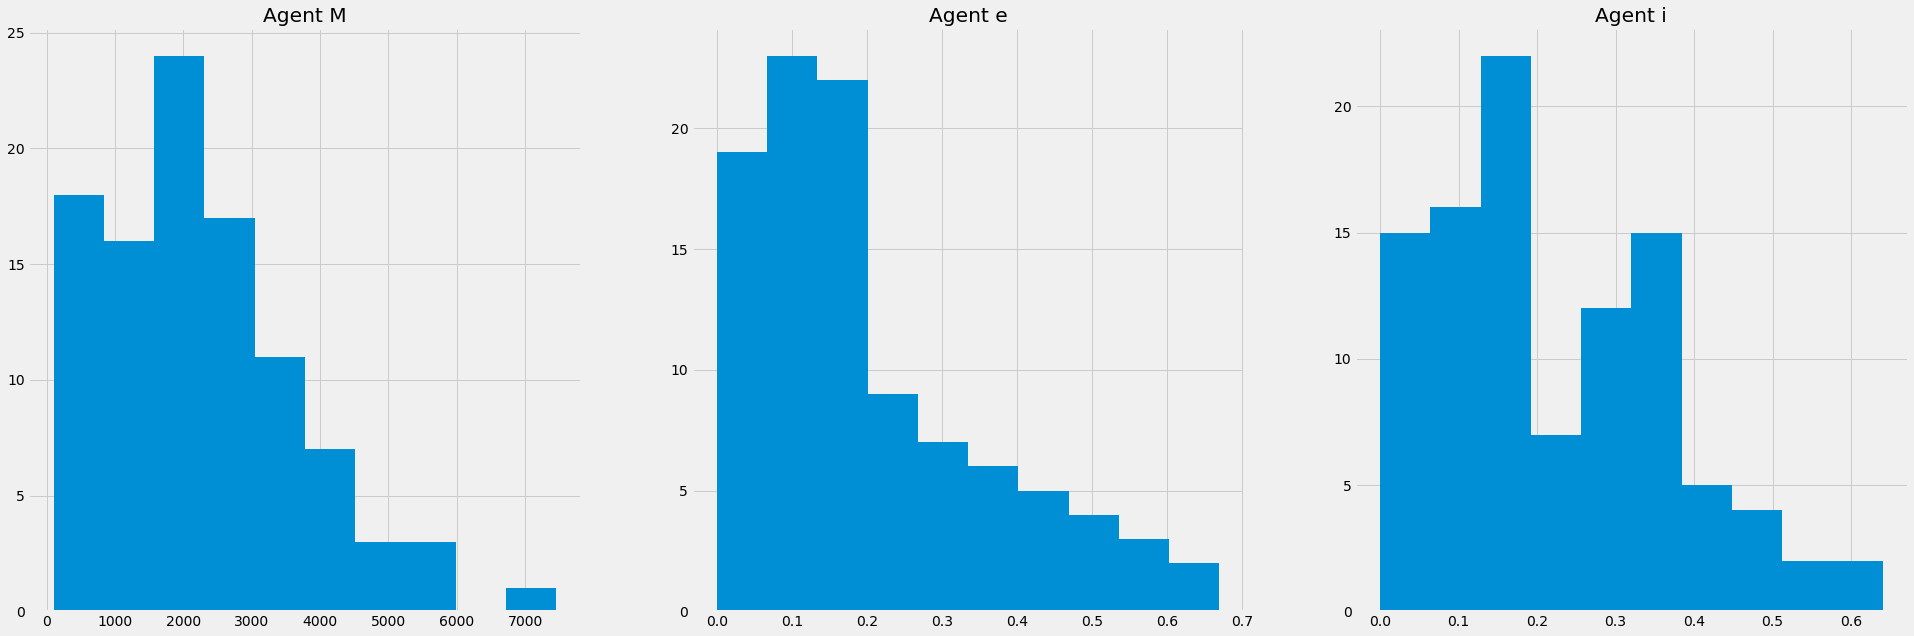

In [3]:
check_parameters(agents, M, E, I)

In [4]:
tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 154 minutes.


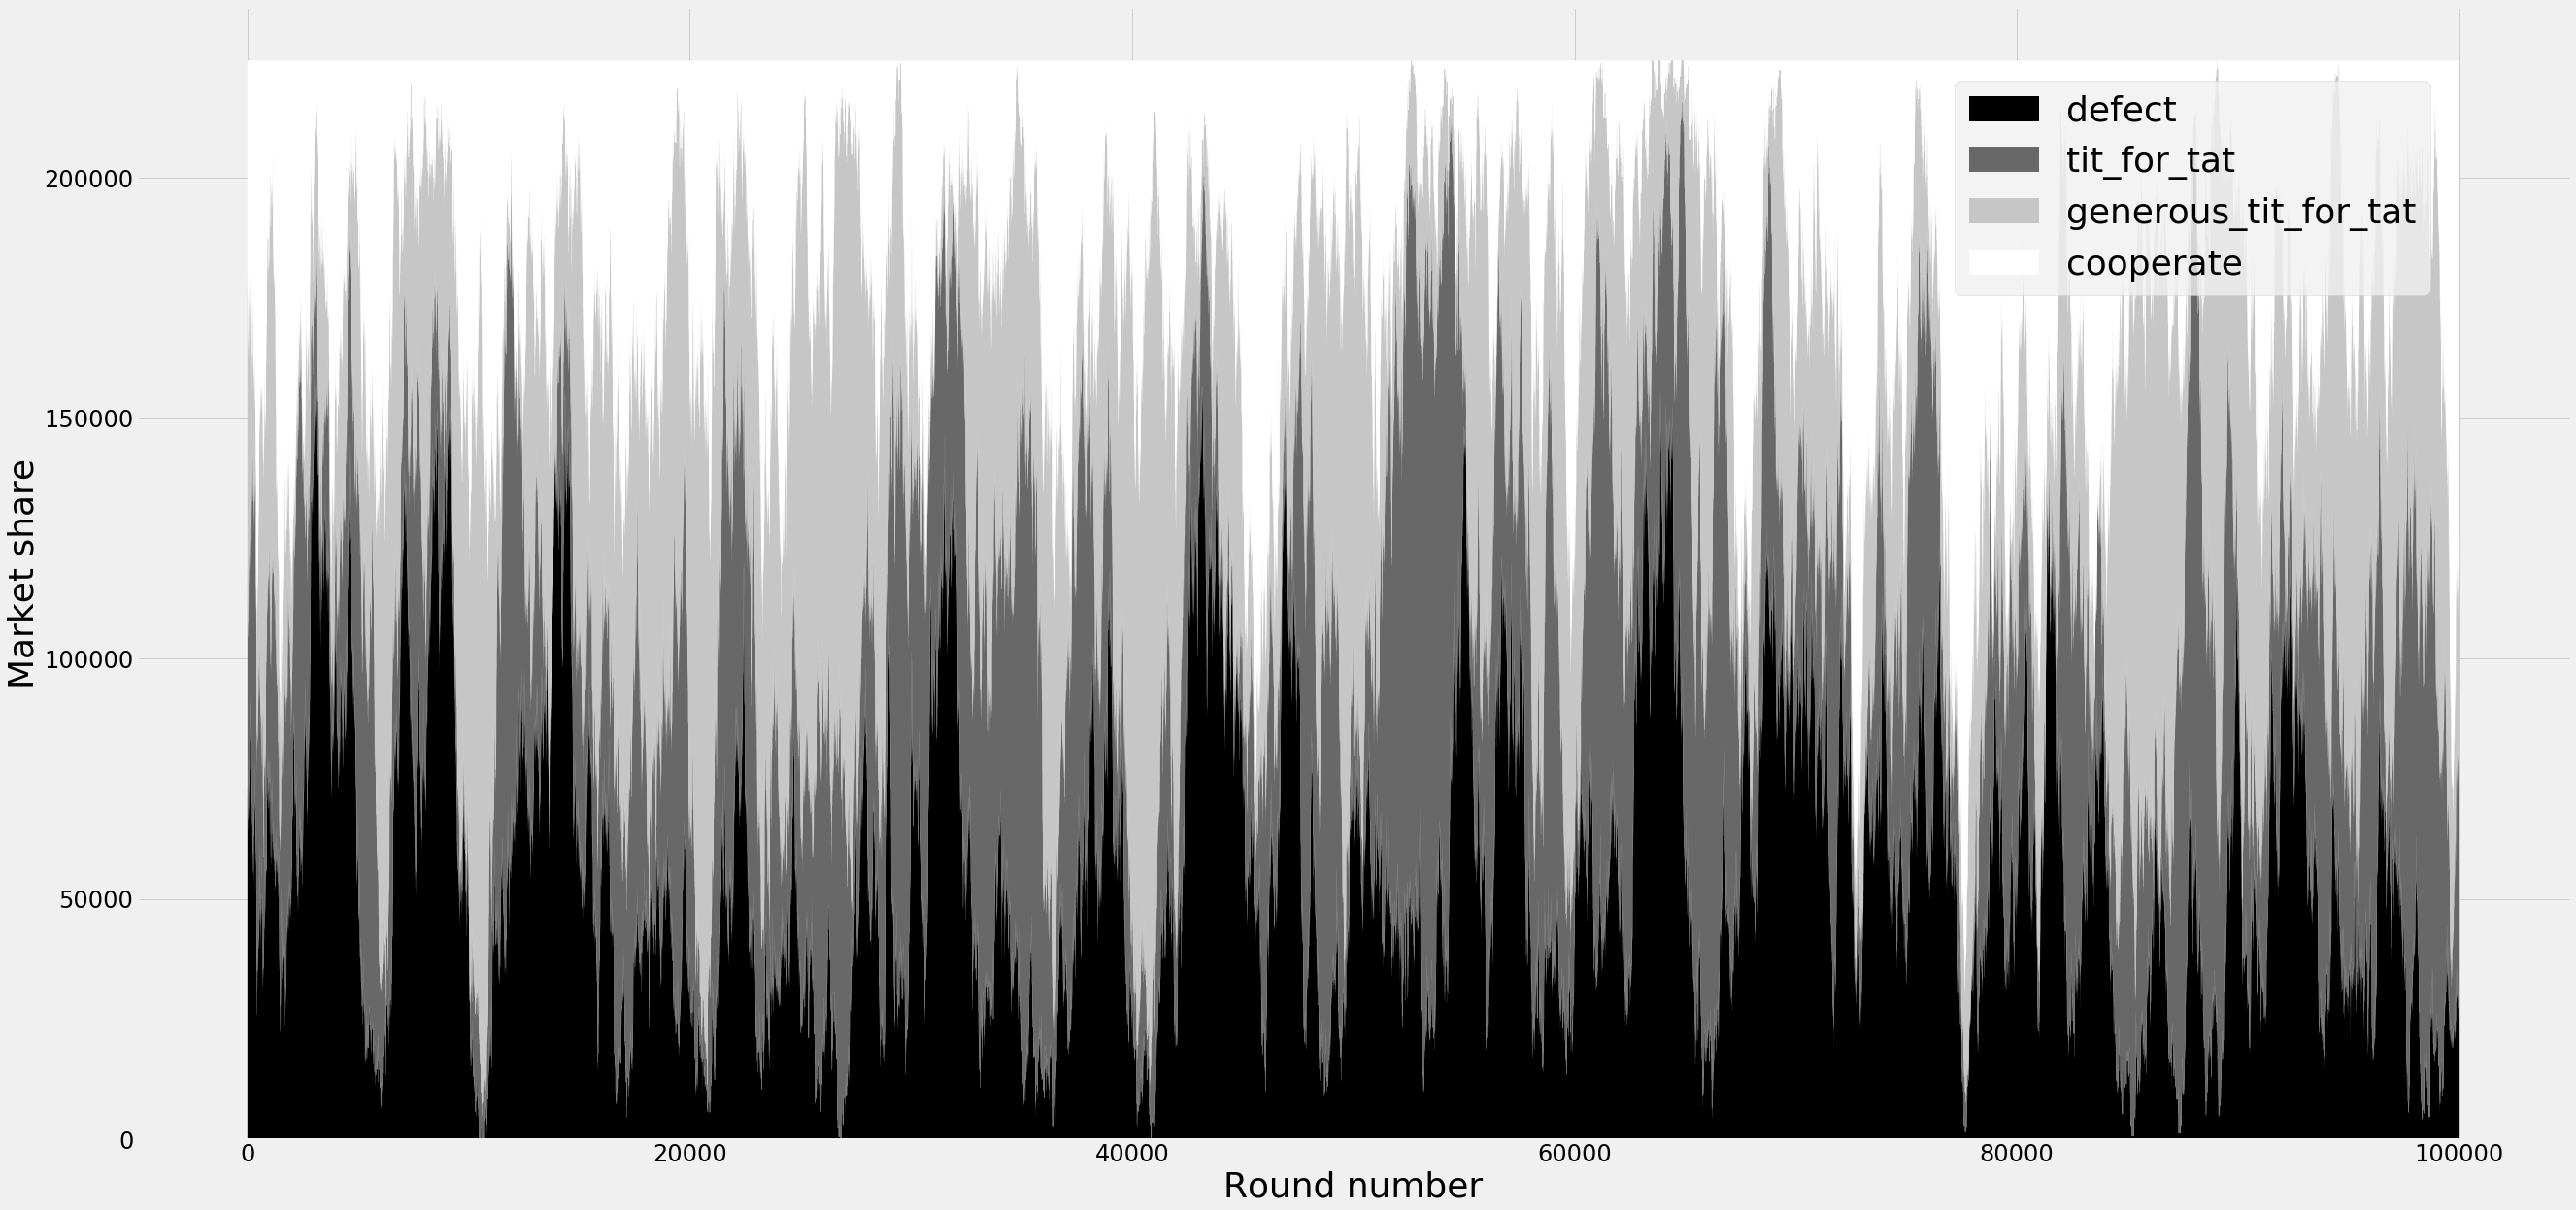

In [5]:
draw_stack(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02)

C:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


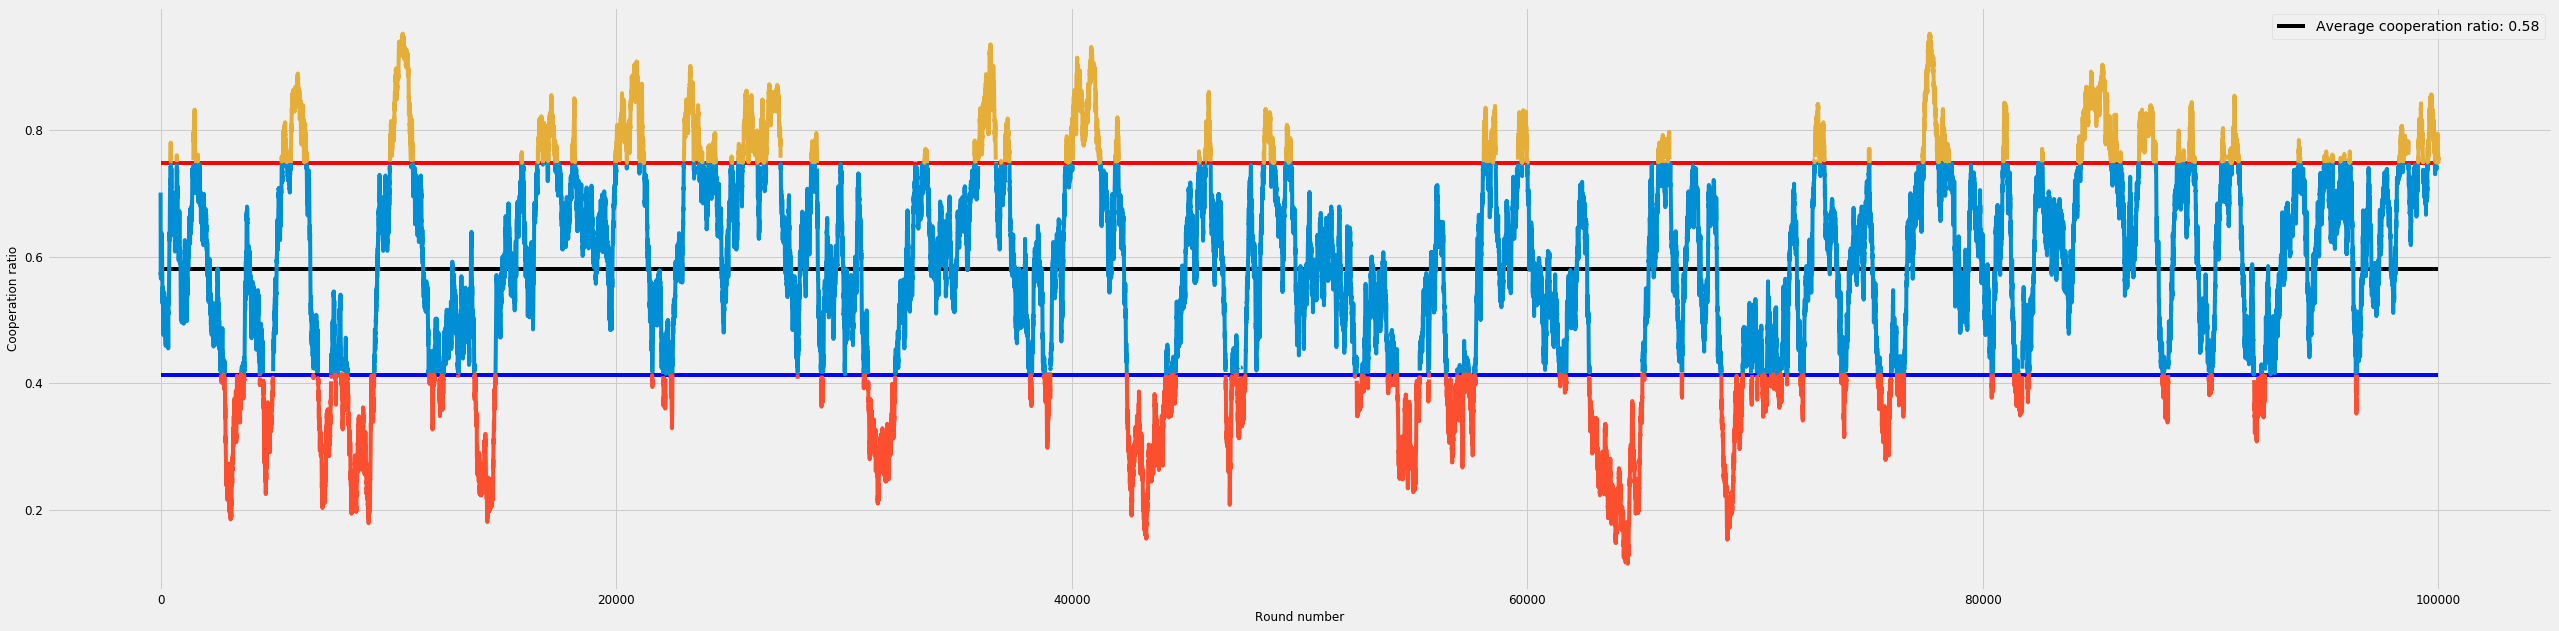

In [6]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02, constant = 1)

In [9]:
outliers = count_outliers(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv", encoding='utf-8', index = False, float_format='%.1f')

KeyboardInterrupt: 

In [12]:
save_cooperate_csv(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02, type_of_tournament= "tournament_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02", seed = str(seed))